In [1]:
!git clone -q https://github.com/Chandrahas-B/MLOps
%cd MLOps

/content/MLOps


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("./diabetes-dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
from sklearn.model_selection import train_test_split

def data_split(df, target, test_size):
  X,Y = df.drop([target], axis=1), df[target]
  x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = test_size)
  train = pd.concat([x_train,y_train],axis=1)
  test = pd.concat([x_test,y_test],axis=1)
  print(x_train.shape, x_test.shape)
  return x_train, x_test, y_train, y_test

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

def preprocessing(df):
  for i in df.columns:
    if df[i].dtype == 'object':
      df[i] = df[i].fillna(df[i].mode())
      df[i] = le.fit_transform(df[i])
    else:
      df[i] = df[i].fillna(df[i].median())
  return df

In [7]:
df = preprocessing(df)
x_train, x_test, y_train, y_test = data_split(df, 'Outcome', 0.2)

(1600, 8) (400, 8)


### MODEL BUILDING

In [100]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import RandomizedSearchCV

best_model = rfc(max_samples=723,max_leaf_nodes=94,max_features='log2',max_depth=13)
num_iter = 15

In [103]:
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=13, max_features='log2', max_leaf_nodes=94,
                       max_samples=723)

In [104]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
train_pred = best_model.predict(x_train)
print("\t\tTRAIN:\n")
print(f"Accuracy: {accuracy_score(y_train, train_pred)}\n")
print(f"Classification report: \n {classification_report(y_train, train_pred)}")
train_cm = confusion_matrix(y_train, train_pred)
print(f"Confusion matrix: \n {confusion_matrix(y_train, train_pred)}")

		TRAIN:

Accuracy: 0.99

Classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1044
           1       0.99      0.98      0.99       556

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600

Confusion matrix: 
 [[1040    4]
 [  12  544]]


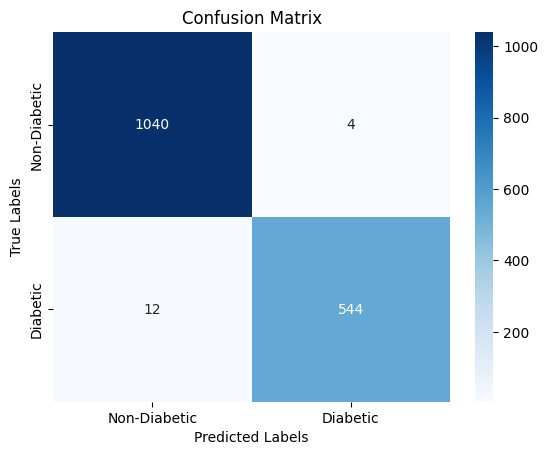

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

class_labels = ['Non-Diabetic', 'Diabetic']
ticks = np.arange(len(class_labels)) + 0.5
plt.xticks(ticks, class_labels)
plt.yticks(ticks, class_labels)
plt.show()

In [106]:
test_pred = best_model.predict(x_test)
print("\t\tTEST:\n")
print(f"Accuracy: {accuracy_score(y_test, test_pred)}\n")
print(f"Classification report: \n {classification_report(y_test, test_pred)}")
test_cm = confusion_matrix(y_test, test_pred)
print(f"Confusion matrix: \n {test_cm}")

		TEST:

Accuracy: 0.9475

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       272
           1       0.97      0.87      0.91       128

    accuracy                           0.95       400
   macro avg       0.95      0.93      0.94       400
weighted avg       0.95      0.95      0.95       400

Confusion matrix: 
 [[268   4]
 [ 17 111]]


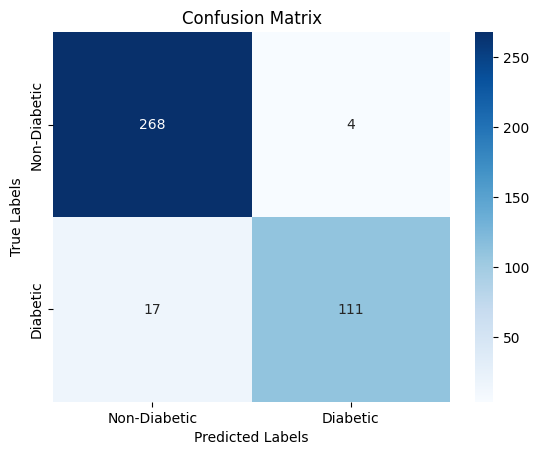

In [108]:
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

class_labels = ['Non-Diabetic', 'Diabetic']
ticks = np.arange(len(class_labels)) + 0.5
plt.xticks(ticks, class_labels)
plt.yticks(ticks, class_labels)
plt.show()

In [109]:
%cd ..

/


In [114]:
import pickle

file_name = 'randomForest.pkl'
with open(file_name, 'wb') as f:
    pickle.dump(best_model, f)

In [115]:
from google.colab import files

files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>